<h2>This notebook used to analyse the official NBA Teams statistics.<h2>

0. Imports

In [305]:
import pandas as pd
from nba_api.stats.endpoints import teamgamelog
from nba_api.stats.static import teams
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

<h3>1. Get a specific team's game log.<h3>

In [306]:
def get_team_log(team):
    id = teams.find_teams_by_full_name(team)[0]['id']
    log = pd.DataFrame(teamgamelog.TeamGameLog(team_id=[id]).get_normalized_dict()["TeamGameLog"])

    return log

df = get_team_log('Atlanta Hawks')

<h3>2. Visualize a team process in points.<h3>

First, prepare the data:

In [307]:
def prepare_data(log):
    log['WL'] = log['WL'].map(lambda x: 1 if x == 'W' else 0)
    new_log = log[::-1]
    new_log.reset_index(drop=True)
    new_log.index = np.arange(new_log['PTS'].count())

    return new_log

df_prepared = prepare_data(df)

In [308]:
def make_plot_from_season_pts(log):
    pts = log['PTS']

    fig = px.line(pts)

    fig.show()

make_plot_from_season_pts(df_prepared)

<h3>3. Make a regression model for the pts data.<h3>

Make a regression model, fitted the points of a team.

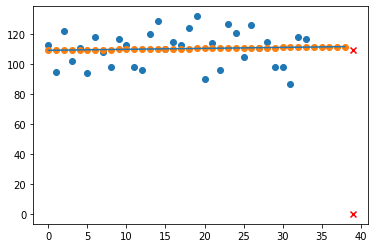

In [309]:
def make_regression(log):   
    #labels 
    y = log['PTS']
    #training data
    X = np.arange(y.count())[:,np.newaxis]
    #model
    model = LinearRegression().fit(X,y)
    
    #new predictors
    xfit = np.arange(y.count()+5)
    Xfit = xfit[:, np.newaxis]
    #predictand values
    yfit = model.predict(Xfit)

    #plot
        #train values
    plt.scatter(X, y)
        #predictor value
    plt.scatter(y.count()+5, 0, c='red', marker='x')
        #predictand value
    plt.scatter(y.count()+5, model.predict(np.array(5.8).reshape(-1,1)), c='red', marker='x')
        #new values
    plt.scatter(xfit, yfit)
        #plot a line
    plt.plot(xfit, yfit)

make_regression(df_prepared)

Its literally useless.

<h3>4. Lets see which attributes inpact more to the outcome.<h3>

<h3>5. Some Visualization<h3>

In [310]:
df_prepared.head()

,Team_ID,Game_ID,GAME_DATE,MATCHUP,WL,W,L,W_PCT,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1610612737,0022100014,"OCT 21, 2021",ATL vs. DAL,1,1,0,1.000,240,45,...,0.889,6,49,55,31,8,9,13,16,113
1,1610612737,0022100027,"OCT 23, 2021",ATL @ CLE,0,1,1,0.500,240,38,...,0.600,17,37,54,20,5,3,9,23,95
2,1610612737,0022100043,"OCT 25, 2021",ATL vs. DET,1,2,1,0.667,240,46,...,0.857,10,39,49,24,11,3,13,19,122
3,1610612737,0022100059,"OCT 27, 2021",ATL @ NOP,1,3,1,0.750,240,40,...,0.824,21,34,55,21,4,4,11,14,102
4,1610612737,0022100066,"OCT 28, 2021",ATL @ WAS,0,3,2,0.600,240,48,...,0.643,6,37,43,26,4,3,13,16,111


In [311]:
df_prepared.columns

Index(['Team_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'W', 'L', 'W_PCT',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

<h4>Histogram about how many points the team scored each game, colored by the result of the game<h4>

In [312]:
def make_histogram_from_pts(log):

    fig = px.histogram(log, "PTS", color="WL", title="Histogram about how many points the team scored each game, colored by the result of the game")
    fig.show()

make_histogram_from_pts(df_prepared)

<h4>Lets see the deviation of the team's scores<h4>

In [313]:
def make_boxplot_from_pts(log):

    fig = px.box(log, 'PTS', title="Deviation of the teams's scores")
    fig.show()

make_boxplot_from_pts(df_prepared)

#TODO - mikor, ki ellen és miért történt a 77 pontos mérkőzés("Chicago Bulls")

<h4>Clean matchup column a little<h4>

In [314]:
df_prepared['MATCHUP'] = df_prepared['MATCHUP'].map(lambda x: x.split(' ')[2])
df_prepared.head()

,Team_ID,Game_ID,GAME_DATE,MATCHUP,WL,W,L,W_PCT,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1610612737,0022100014,"OCT 21, 2021",DAL,1,1,0,1.000,240,45,...,0.889,6,49,55,31,8,9,13,16,113
1,1610612737,0022100027,"OCT 23, 2021",CLE,0,1,1,0.500,240,38,...,0.600,17,37,54,20,5,3,9,23,95
2,1610612737,0022100043,"OCT 25, 2021",DET,1,2,1,0.667,240,46,...,0.857,10,39,49,24,11,3,13,19,122
3,1610612737,0022100059,"OCT 27, 2021",NOP,1,3,1,0.750,240,40,...,0.824,21,34,55,21,4,4,11,14,102
4,1610612737,0022100066,"OCT 28, 2021",WAS,0,3,2,0.600,240,48,...,0.643,6,37,43,26,4,3,13,16,111


<h4>Lets see the mean of scored point against each other team<h4>

In [315]:
by_opponent = pd.DataFrame()
by_opponent['count'] = df_prepared.groupby('MATCHUP')['PTS'].count()
by_opponent['min'] = df_prepared.groupby('MATCHUP')['PTS'].min()
by_opponent['max'] = df_prepared.groupby('MATCHUP')['PTS'].max()
by_opponent['mean'] = df_prepared.groupby('MATCHUP')['PTS'].mean()
by_opponent['median'] = df_prepared.groupby('MATCHUP')['PTS'].median()
by_opponent

,count,min,max,mean,median
MATCHUP,,,,,
BKN,2,105,108,106.500000,106.5
BOS,1,110,110,110.000000,110.0
CHA,2,115,127,121.000000,121.0
CHI,2,117,118,117.500000,117.5
CLE,1,95,95,95.000000,95.0
DAL,1,113,113,113.000000,113.0
DEN,2,96,115,105.500000,105.5
DET,1,122,122,122.000000,122.0
GSW,1,113,113,113.000000,113.0


<h4>Lets see the wins deviation by the month and week days.<h4>

In [316]:
def make_day_table(log):
    log = log[['GAME_DATE','WL']]
    log['GAME_DATE'] = pd.to_datetime(log['GAME_DATE'], format="%b %d, %Y")
    log['day_in_month'] = log['GAME_DATE'].map(lambda x: int(x.strftime("%d")))
    log['day_in_week'] = log['GAME_DATE'].map(lambda x: int(x.strftime("%w")))
    return log

df_by_day = make_day_table(df_prepared)

C:\Users\milan\AppData\Local\Temp/ipykernel_21628/4267274041.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\milan\AppData\Local\Temp/ipykernel_21628/4267274041.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\milan\AppData\Local\Temp/ipykernel_21628/4267274041.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [317]:
def make_histogram_by_month_days(log):

    log = log.sort_values('day_in_month')
    fig = px.histogram(log, "day_in_month", color='WL')
    fig.show()

make_histogram_by_month_days(df_by_day)

In [318]:
def make_histogram_by_week_days(log):

    log = log.sort_values('day_in_week')
    fig = px.histogram(log, "day_in_week", color='WL')
    fig.show()

make_histogram_by_week_days(df_by_day)

<h4>After that, its gona be useful to look at the opponent scoring data<h4>

In [319]:
df_opponent = get_team_log("Cleveland Cavaliers")
opponent_prepared = prepare_data(df_opponent)
make_plot_from_season_pts(opponent_prepared)

In [320]:
make_histogram_from_pts(opponent_prepared)

In [321]:
make_boxplot_from_pts(opponent_prepared)

In [322]:
opponent_prepared['MATCHUP'] = opponent_prepared['MATCHUP'].map(lambda x: x.split(' ')[2])
by_opponent = pd.DataFrame()
by_opponent['count'] = opponent_prepared.groupby('MATCHUP')['PTS'].count()
by_opponent['min'] = opponent_prepared.groupby('MATCHUP')['PTS'].min()
by_opponent['max'] = opponent_prepared.groupby('MATCHUP')['PTS'].max()
by_opponent['mean'] = opponent_prepared.groupby('MATCHUP')['PTS'].mean()
by_opponent['median'] = opponent_prepared.groupby('MATCHUP')['PTS'].median()
by_opponent

,count,min,max,mean,median
MATCHUP,,,,,
ATL,1,101,101,101.000000,101.0
BKN,2,99,112,105.500000,105.5
BOS,3,91,101,94.666667,92.0
CHA,2,112,113,112.500000,112.5
CHI,1,115,115,115.000000,115.0
DAL,1,114,114,114.000000,114.0
DEN,1,99,99,99.000000,99.0
DET,1,98,98,98.000000,98.0
GSW,1,89,89,89.000000,89.0
